# Simulating Pandemics with MCMC Simualtions

## Stage one. Simulate the SIS model
* The transition probabilities in these models are not static. 
* We have to reculate the probabilites depending on the state of the system
* 


In [250]:
from random import uniform
import matplotlib.pyplot as plt 
import numpy as np

In [251]:
def calculate_increase_prop(i, beta, N, delta_t):
    return beta * i * (N - i) / N * delta_t

In [252]:
def calculate_recovered_prop(i, gamma, delta_t):
    return gamma * i * delta_t

In [253]:
def run_SIS_simulation(beta=0.5, gamma=0.52, N=1000, delta_t=1, iterations=10000, i_start=1):
    i_list = [i_start]
    s_list = [N - i_list[-1]]
    for n in range(0, iterations):
        i = i_list[-1]
        s = s_list[-1]
        increase_prob = calculate_increase_prop(i, beta, N, delta_t)
        decrease_prob = calculate_recovered_prop(i, gamma, delta_t)
        no_change_prob = 1 - increase_prob - decrease_prob
        u = uniform(0, 1)
        if u < increase_prob:
            i_new = i + 1
            s_new = s - 1
        elif u > increase_prob and u < (increase_prob + decrease_prob):
            i_new = i - 1
            s_new = s + 1
        else:
            i_new = i
            s_new = s
        
        i_list.append(i_new)
        s_list.append(s_new)
    return np.arange(0, iterations*delta_t + delta_t, delta_t), i_list, s_list

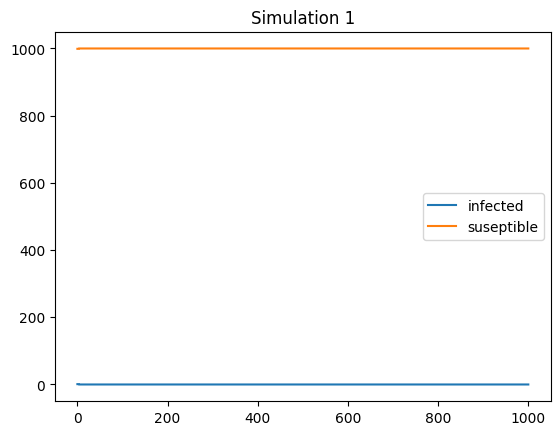

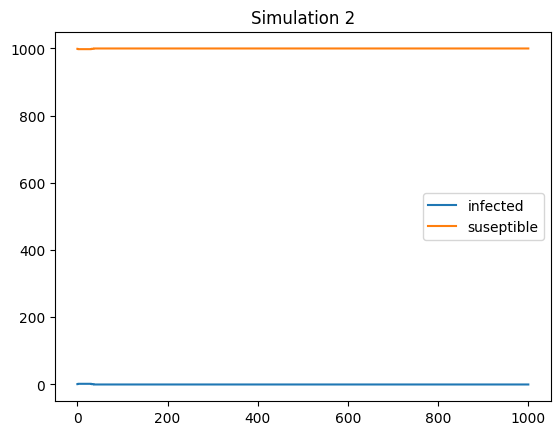

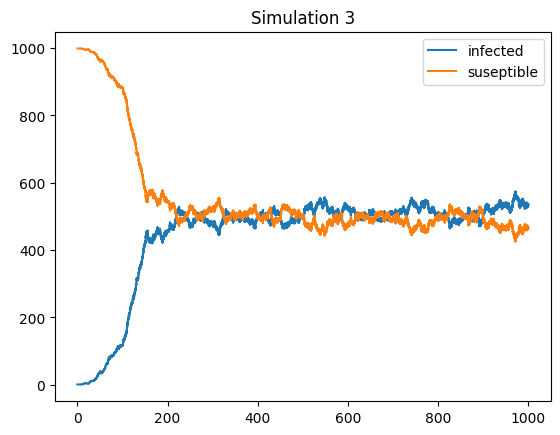

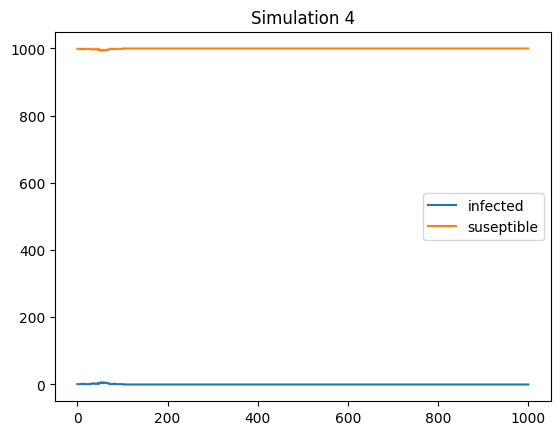

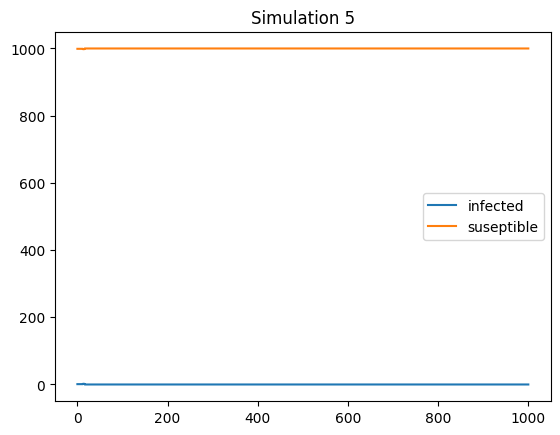

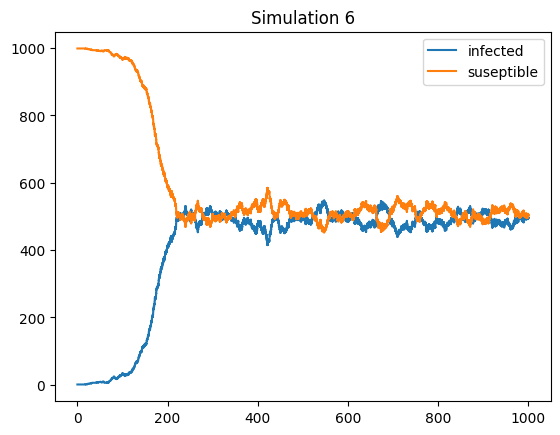

In [262]:
for sim in range(1, 7):
    t, i, s = run_SIS_simulation(gamma=0.04, beta=0.08, delta_t=0.01, iterations=100000)
    plt.figure()
    plt.title(f'Simulation {sim:0d}')
    plt.plot(t, i, label='infected')
    plt.plot(t, s, label='suseptible')
    plt.legend()